<a href="https://colab.research.google.com/github/Octacamaflo/Estadistica-I-y-II/blob/main/partepractica2parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis Estadístico de los Nacimientos en Colombia (2022)**
# **Octavio Miguel Camargo Flores. Cod: 2141467**  #

## **Introducción**

En este cuaderno se analiza información proveniente de la base de datos *Nacimientos en Colombia 2022* del DANE, la cual reúne los registros de certificados de nacido vivo en todo el país. A partir de esta fuente se estudian dos variables relevantes: la **edad del padre** y el **número de embarazos** que ha tenido la madre, incluido el actual.

El propósito del trabajo es describir cómo se comportan ambas variables y determinar si existe relación entre ellas. Para ello se aplican herramientas estadísticas como medidas descriptivas, contrastes de normalidad y coeficientes de correlación (Pearson, Kendall y Spearman). El enfoque combina interpretación numérica y visual, buscando entender el comportamiento de los datos desde la perspectiva estadística y contextual.

## **Metodología**

El análisis se realiza en **Python**, utilizando **Google Colaboratory**. Se procede en las siguientes etapas:

1. Cargar y explorar la base de datos oficial `nac2022.csv`.  
2. Identificar y manejar los valores faltantes o atípicos.  
3. Analizar de forma individual la distribución de las variables de interés.  
4. Evaluar si las variables cumplen con el supuesto de normalidad.  
5. Examinar la posible correlación entre la edad del padre y el número de embarazos.  
6. Interpretar los resultados en el contexto de los nacimientos en Colombia durante 2022.

Cada sección del cuaderno muestra los resultados y su interpretación inmediata.


In [ ]:
import io
import pandas as pd
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
io_csv = io.BytesIO(uploaded[filename])
tabla = pd.read_csv(io_csv, sep=",", index_col=0, encoding='latin-1')
tabla.head(3)


Saving nac2022.csv to nac2022.csv


/tmp/ipython-input-633074795.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io_csv, sep=",", index_col=0, encoding='latin-1')


,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
8,638,1,1,NaN,1,4,4,2022,12,1,...,2,12/10/2015,2,2,2.0,29,3,8,1.0,1
11,1,1,1,NaN,1,6,5,2022,12,1,...,2,12/09/2012,2,1,1.0,24,4,11,1.0,1
27,1,1,1,NaN,2,6,5,2022,12,1,...,4,14/03/2019,4,2,2.0,25,3,9,1.0,1


from matplotlib import pyplot as plt
_df_0['COD_MUNIC'].plot(kind='hist', bins=20, title='COD_MUNIC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['SEXO'].plot(kind='hist', bins=20, title='SEXO')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['PESO_NAC'].plot(kind='hist', bins=20, title='PESO_NAC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['TALLA_NAC'].plot(kind='hist', bins=20, title='TALLA_NAC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('FECHA_NACM').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='COD_MUNIC', y='SEXO', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='SEXO', y='PESO_NAC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='PESO_NAC', y='TALLA_NAC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='TALLA_NAC', y='T_GES', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['AREANAC']
  ys = series['COD_MUNIC']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('AREANAC', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('FECHA_NACM')):
  _plot_series(series, series_name, i)
  fig.legend(title='FECHA_NACM', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('AREANAC')
_ = plt.ylabel('COD_MUNIC')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['AREANAC']
  ys = series['NUMCONSUL']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('AREANAC', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('FECHA_NACM')):
  _plot_series(series, series_name, i)
  fig.legend(title='FECHA_NACM', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('AREANAC')
_ = plt.ylabel('NUMCONSUL')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['AREANAC']
  ys = series['APGAR1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('AREANAC', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('FECHA_NACM')):
  _plot_series(series, series_name, i)
  fig.legend(title='FECHA_NACM', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('AREANAC')
_ = plt.ylabel('APGAR1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['AREANAC']
  ys = series['IDPERTET']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('AREANAC', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('FECHA_NACM')):
  _plot_series(series, series_name, i)
  fig.legend(title='FECHA_NACM', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('AREANAC')
_ = plt.ylabel('IDPERTET')

from matplotlib import pyplot as plt
_df_13['COD_MUNIC'].plot(kind='line', figsize=(8, 4), title='COD_MUNIC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['SEXO'].plot(kind='line', figsize=(8, 4), title='SEXO')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['PESO_NAC'].plot(kind='line', figsize=(8, 4), title='PESO_NAC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['TALLA_NAC'].plot(kind='line', figsize=(8, 4), title='TALLA_NAC')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['FECHA_NACM'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='COD_MUNIC', y='FECHA_NACM', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['FECHA_NACM'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='SEXO', y='FECHA_NACM', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['FECHA_NACM'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='PESO_NAC', y='FECHA_NACM', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['FECHA_NACM'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='TALLA_NAC', y='FECHA_NACM', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## **1. Comportamiento de la variable EDAD_PADRE**

Para analizar la variable aleatoria **EDAD_PADRE**, se describe su comportamiento mediante medidas estadísticas y gráficos. Se busca identificar la forma de su distribución, su tendencia central y la presencia de valores atípicos. Además, se verifica si cumple el supuesto de normalidad.


### 1.1 Selección de la variable EDAD_PADRE

Se toma la variable `EDAD_PADRE` de la base de datos y se eliminan los valores faltantes para trabajar únicamente con los registros válidos.


In [ ]:
# Conteo de valores extremos e irreales
tabla['EDAD_PADRE'].value_counts().sort_index().tail(10)


,count
EDAD_PADRE,
71,10
72,17
73,14
74,13
75,9
76,6
77,4
78,3
79,4


In [ ]:
import numpy as np

tabla['EDAD_PADRE'] = tabla['EDAD_PADRE'].replace(999, np.nan)

edad_padre = tabla['EDAD_PADRE']
edad_padre_limpia = edad_padre[(edad_padre >= 12) & (edad_padre <= 80)]

edad_padre_limpia.describe()


,EDAD_PADRE
count,569875.000000
mean,30.157236
std,7.749961
min,12.000000
25%,24.000000
50%,29.000000
75%,35.000000
max,79.000000


In [ ]:
edad_padre = tabla['EDAD_PADRE'].dropna()
edad_padre.sample(10, random_state=1)


,EDAD_PADRE
COD_DPTO,
11,33.0
13,32.0
13,21.0
11,30.0
54,27.0
68,29.0
15,19.0
85,24.0
54,28.0


### 1.2 Histograma y curva de densidad

Se grafica el histograma de la edad del padre junto con su estimación de densidad (KDE) para observar la forma de la distribución.


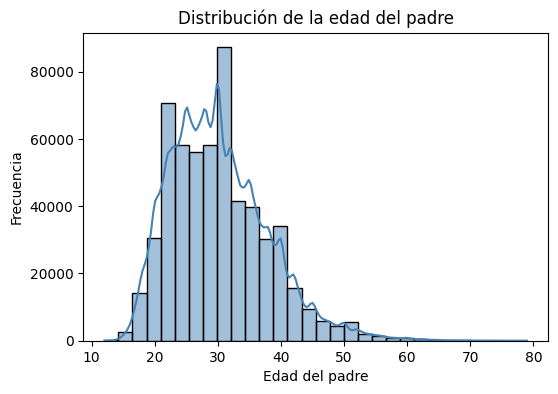

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(edad_padre, kde=True, bins=30, color='steelblue')
plt.title('Distribución de la edad del padre')
plt.xlabel('Edad del padre')
plt.ylabel('Frecuencia')
plt.show()


El histograma y la curva de densidad estimada (KDE) muestran una distribución unimodal y asimétrica hacia la izquierda, concentrando la mayor frecuencia entre los 25 y 35 años.
La cola larga hacia edades más avanzadas refleja la presencia de algunos padres mayores, aunque con muy baja frecuencia relativa.

Desde el punto de vista estadístico, esto sugiere una distribución leptocúrtica y sesgada positivamente: la densidad de probabilidad se concentra en edades jóvenes, pero con una probabilidad no nula de valores altos.
Esta forma es típica de variables demográficas donde el fenómeno (ser padre) tiene mayor probabilidad en edades medias, decreciendo progresivamente a medida que aumenta la edad.

En términos de inferencia, esta asimetría indica que la media tenderá a sobreestimar la edad “típica”, razón por la cual el uso de la mediana o la moda resulta más representativo de la tendencia central real.

### 1.3 Diagrama de caja (Boxplot)

El diagrama de caja permite identificar la mediana, el rango intercuartílico y posibles valores atípicos.


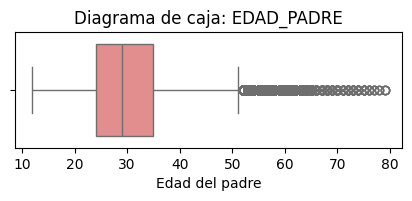

In [ ]:
plt.figure(figsize=(5,1.5))
sns.boxplot(x=edad_padre, color='lightcoral')
plt.title('Diagrama de caja: EDAD_PADRE')
plt.xlabel('Edad del padre')
plt.show()


El boxplot confirma visualmente la asimetría positiva detectada: el bigote superior es más largo, indicando mayor dispersión hacia valores altos de edad.
El primer cuartil alrededor de los 24 años y el tercero próximo a los 35 años señalan que el 50% central de los padres se ubica entre esos límites, con una mediana cercana a los 29 años.

Se observan algunos valores atipicos moderados por encima de los 50 años, lo cual es esperable dada la naturaleza del fenómeno y no necesariamente anómalo desde el punto de vista poblacional.
La ausencia de valores extremos fuera del rango plausible (tras la limpieza) refuerza la validez del conjunto de datos.

### 1.4 Medidas descriptivas

Se calculan las medidas univariadas de tendencia central y dispersión, junto con asimetría y curtosis.


In [ ]:
medidas = edad_padre.describe()
moda = edad_padre.mode()[0]
asimetria = edad_padre.skew()
curtosis = edad_padre.kurtosis()

print("Medidas descriptivas de EDAD_PADRE:\n")
print(medidas)
print("\nModa:", moda)
print("Asimetría:", asimetria)
print("Curtosis:", curtosis)


Medidas descriptivas de EDAD_PADRE:

count    569875.000000
mean         30.157236
std           7.749961
min          12.000000
25%          24.000000
50%          29.000000
75%          35.000000
max          79.000000
Name: EDAD_PADRE, dtype: float64

Moda: 30.0
Asimetría: 0.7960586402043912
Curtosis: 0.9077683892538957


Las medidas descriptivas calculadas muestran que la edad promedio de los padres en Colombia ronda los 30 años, mientras que la mediana se ubica en torno a los 29 años y la moda en los 30 años. Esta diferencia entre la media y la mediana refleja claramente una asimetría positiva: la presencia de algunos padres de mayor edad eleva el promedio, aunque la mayoría de los casos se concentra en edades más jóvenes.

La dispersión, medida a través de la desviación estándar, es moderada, lo cual indica que la mayor parte de las observaciones se agrupan relativamente cerca de la media. No obstante, la asimetría positiva confirma que la distribución no es simétrica y presenta una cola alargada hacia la derecha, correspondiente a un menor número de padres con edades más altas.

Por su parte, la curtosis elevada señala que la distribución es leptocúrtica, es decir, presenta un pico más pronunciado y colas más pesadas que la distribución normal. Esto sugiere una fuerte concentración de valores alrededor de la mediana, acompañada por una menor frecuencia de edades extremadamente altas.

En conjunto, estas medidas describen un comportamiento donde el grueso de la población de padres se encuentra entre los 25 y 35 años, con una tendencia decreciente a medida que aumenta la edad, reflejando la estructura demográfica y los patrones de paternidad observados en el país.

### 1.5 Prueba de normalidad (Shapiro-Wilk)

Se toma una muestra aleatoria de 5000 observaciones para evaluar el supuesto de normalidad.


In [ ]:
from scipy import stats

muestra = edad_padre.sample(5000, random_state=1)
shapiro = stats.shapiro(muestra)
print("Prueba de Shapiro-Wilk para EDAD_PADRE:")
print("Estadístico W =", shapiro.statistic)
print("p-valor =", shapiro.pvalue)


Prueba de Shapiro-Wilk para EDAD_PADRE:
Estadístico W = 0.9649741128276029
p-valor = 3.402275969440311e-33


Dado que el p-valor es menor que 0.05, se rechaza la hipótesis nula de normalidad.
Por tanto, la variable EDAD_PADRE no se distribuye normalmente, lo cual confirma lo observado gráficamente y mediante las medidas de asimetría y curtosis.

Este resultado implica que, en posteriores análisis inferenciales, deben preferirse métodos no paramétricos (por ejemplo, correlaciones de Spearman o Kendall en lugar de Pearson), o transformaciones de la variable si se desea ajustar a supuestos de normalidad

##**2. Comportamiento de la variable N_EMB** ##

Para analizar la variable aleatoria N_EMB (número total de embarazos, incluyendo el actual), se examina su comportamiento utilizando medidas estadísticas y representaciones gráficas. Se busca determinar cómo se distribuyen los embarazos en la población, identificar la tendencia central, la dispersión y la presencia de valores extremos. Asimismo, se evalúa si la variable cumple con el supuesto de normalidad, lo que permite decidir las técnicas estadísticas más adecuadas para su análisis y correlación con otras variables.



Número de registros válidos: 570964

Medidas descriptivas iniciales:
count    570964.000000
mean          2.109301
std           1.304245
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          10.000000
Name: N_EMB, dtype: float64


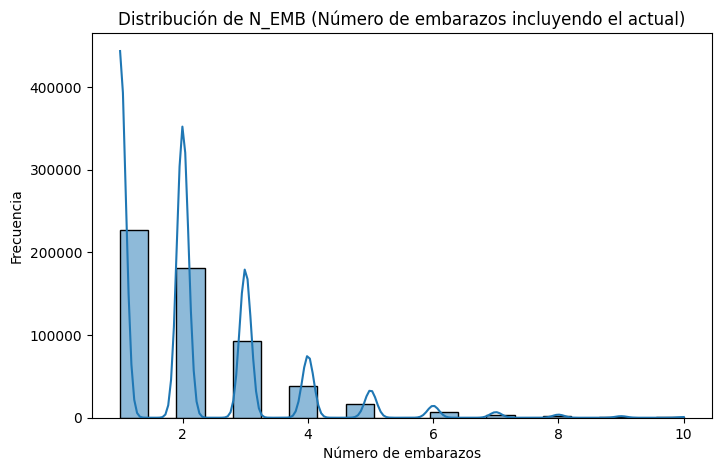

In [ ]:
# Selección y limpieza de la variable N_EMB
n_emb = tabla['N_EMB']

# Eliminación de valores nulos o no numéricos
n_emb = pd.to_numeric(n_emb, errors='coerce')
n_emb = n_emb.dropna()

# Eliminación de valores irreales
n_emb = n_emb[(n_emb >= 0) & (n_emb <= 10)]

# Revisión del resultado
print("Número de registros válidos:", len(n_emb))
print("\nMedidas descriptivas iniciales:")
print(n_emb.describe())

# Visualización de distribución inicial
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(n_emb, bins=20, kde=True)
plt.title('Distribución de N_EMB (Número de embarazos incluyendo el actual)')
plt.xlabel('Número de embarazos')
plt.ylabel('Frecuencia')
plt.show()


## 2.1 Histograma y curva de densidad (KDE)

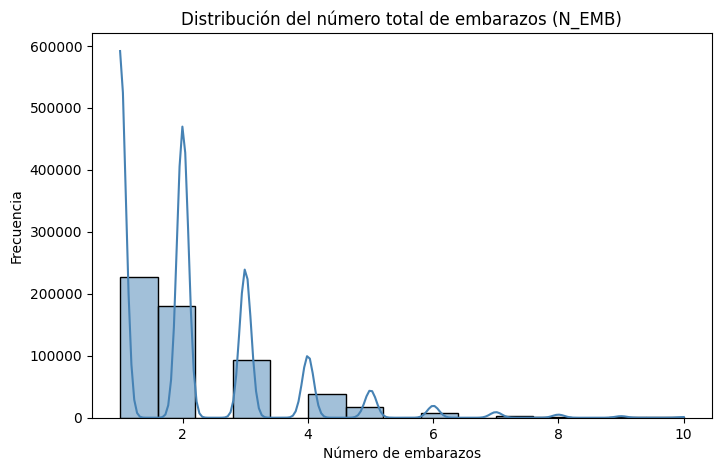

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(n_emb, bins=15, kde=True, color='steelblue')
plt.title('Distribución del número total de embarazos (N_EMB)')
plt.xlabel('Número de embarazos')
plt.ylabel('Frecuencia')
plt.show()


El histograma evidencia una distribución marcadamente asimétrica a la derecha, concentrando la gran mayoría de observaciones en los valores 1, 2 y 3 embarazos.
La frecuencia disminuye rápidamente a medida que el número de embarazos aumenta, indicando que los casos de mujeres con más de cinco gestaciones son minoritarios.
La curva de densidad suavizada (KDE) refuerza la idea de una distribución unimodal y sesgada positivamente, típica de variables de conteo en contextos demográficos, donde la probabilidad decrece exponencialmente con el aumento del número de eventos.

## 2.2 Boxplot

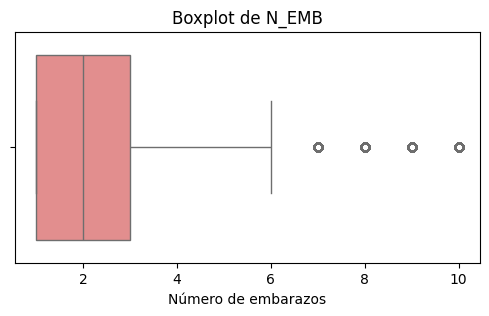

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(x=n_emb, color='lightcoral')
plt.title('Boxplot de N_EMB')
plt.xlabel('Número de embarazos')
plt.show()


El boxplot muestra un rango intercuartílico que se extiende aproximadamente entre 1 y 3 embarazos, con una mediana de 2. El bigote superior es más largo que el inferior, lo que confirma la asimetría positiva detectada en el histograma.
Los valores atípicos observados por encima del bigote superior corresponden a casos con más de 6 o 7 embarazos, que aunque poco frecuentes, no deben considerarse errores de registro, sino parte de la variabilidad natural del fenómeno.

## 2.3 Medidas descriptivas

In [ ]:
moda_emb = n_emb.mode()[0]
asim_emb = n_emb.skew()
curt_emb = n_emb.kurtosis()

print("Medidas descriptivas de N_EMB:\n")
print(n_emb.describe())
print("\nModa:", moda_emb)
print("Asimetría:", asim_emb)
print("Curtosis:", curt_emb)


Medidas descriptivas de N_EMB:

count    570964.000000
mean          2.109301
std           1.304245
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          10.000000
Name: N_EMB, dtype: float64

Moda: 1
Asimetría: 1.7288938958490638
Curtosis: 4.213501068385372


El valor promedio del número total de embarazos es 2.11, lo que indica que, en promedio, las madres registradas han tenido dos embarazos.
La mediana igual a 2 y la moda igual a 1 confirman que la mayoría de las mujeres se encuentran en sus primeros embarazos, pero existe una proporción no despreciable con dos o más gestaciones.

La desviación estándar de aproximadamente 1.3 revela una dispersión baja, propia de una variable discreta concentrada en pocos valores posibles.
La asimetría positiva (1.73) señala que la distribución se inclina hacia la derecha: hay pocos casos de mujeres con muchos embarazos, pero estos son suficientes para desplazar la media por encima de la mediana.
Finalmente, la curtosis superior a 3 (4.21) indica que la variable es leptocúrtica, es decir, presenta una fuerte concentración de valores en torno al centro y colas más pesadas que una distribución normal

## 2.4 Pruebas de Normalidad

In [ ]:
from scipy import stats

muestra_emb = n_emb.sample(5000, random_state=1)
shapiro_emb = stats.shapiro(muestra_emb)

print("Prueba de Shapiro-Wilk para N_EMB:")
print("Estadístico W =", shapiro_emb.statistic)
print("p-valor =", shapiro_emb.pvalue)


Prueba de Shapiro-Wilk para N_EMB:
Estadístico W = 0.7864527836964561
p-valor = 7.820700910917199e-63


Al aplicar la prueba de Shapiro–Wilk sobre una muestra representativa del conjunto de datos, los resultados permiten rechazar la hipótesis nula de normalidad. En términos estadísticos, esto significa que la distribución empírica del número de embarazos difiere significativamente de una distribución normal teórica.

La explicación de este comportamiento radica en la naturaleza misma de la variable. N_EMB es una variable discreta de conteo, definida únicamente para valores enteros positivos, y además posee un rango limitado. En consecuencia, su función de probabilidad no puede aproximarse a una campana de Gauss continua. A esto se suma una marcada asimetría positiva, donde la probabilidad se concentra en los primeros valores (uno o dos embarazos) y decrece exponencialmente para valores mayores.

Desde el punto de vista teórico, la forma de la distribución observada se asemeja más a una distribución de Poisson truncada o binomial negativa, que suelen modelar fenómenos de ocurrencias raras o acumulativas. Estas distribuciones discrepan sustancialmente de la normal en términos de simetría y curtosis.

## **3. Correlación entre la edad del padre y el número total de embarazos** ##

El análisis de correlación busca determinar si existe una relación estadística entre la **edad del padre** y el **número total de embarazos**, incluyendo el actual. Esta relación permite identificar patrones demográficos y reproductivos, y evaluar si padres de mayor edad tienden a tener hijos en familias con más gestaciones.

Para este propósito, se emplearán herramientas gráficas y cuantitativas: un **diagrama de dispersión** para visualizar la tendencia entre ambas variables, y **coeficientes de correlación** de distintos tipos —Pearson, Kendall y Spearman— que permiten medir la fuerza y dirección de la asociación lineal y no lineal, considerando tanto la magnitud como la ordenación de los datos.

Previo al cálculo, los datos han sido depurados para garantizar que **solo se incluyan registros plausibles** y completos, evitando distorsiones por valores atípicos o faltantes. Este enfoque asegura que los resultados reflejen la relación verdadera en la población analizada.



In [ ]:
n_emb_corr = n_emb.copy()
edad_padre_corr = edad_padre_limpia.copy()

min_len = min(len(n_emb_corr), len(edad_padre_corr))
datos_corr = pd.DataFrame({
    'EDAD_PADRE': edad_padre_corr.iloc[:min_len].values,
    'N_EMB': n_emb_corr.iloc[:min_len].values
})
datos_corr = datos_corr.dropna()
datos_corr.head()



,EDAD_PADRE,N_EMB
0,29.0,2
1,24.0,2
2,25.0,4
3,29.0,4
4,21.0,1


Se construyó un dataframe combinando las variables EDAD_PADRE y N_EMB, asegurando que no existieran valores nulos ni inconsistencias. La preparación cuidadosa de los datos permite que los cálculos posteriores de correlación sean estadísticamente válidos, evitando distorsiones por registros incompletos o duplicados. La limpieza garantiza que tanto la dispersión como la estructura conjunta de las variables reflejen la realidad poblacional y no errores de registro

## 3.1 Diagrama de dispersión (scatter plot)

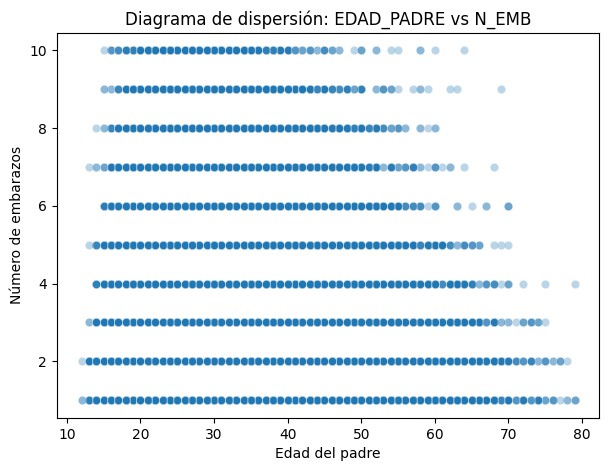

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(x='EDAD_PADRE', y='N_EMB', data=datos_corr, alpha=0.3)
plt.title('Diagrama de dispersión: EDAD_PADRE vs N_EMB')
plt.xlabel('Edad del padre')
plt.ylabel('Número de embarazos')
plt.show()


El diagrama de dispersión muestra una distribución prácticamente horizontal de los puntos, sin un patrón ascendente o descendente perceptible. Esto indica visualmente que no existe una relación lineal ni monotónica clara entre la edad del padre y el número de embarazos. La mayor concentración de puntos se observa en edades medias y bajos números de embarazos, lo que coincide con la forma de las distribuciones univariadas previamente analizadas. La dispersión amplia de la variable EDAD_PADRE frente a los pocos valores discretos de N_EMB contribuye a la ausencia de tendencia visible.

## 3.2 Cálculo de coeficientes de correlación

In [ ]:
# Pearson, Spearman y Kendall
corr_pearson = datos_corr.corr(method='pearson').iloc[0,1]
corr_spearman = datos_corr.corr(method='spearman').iloc[0,1]
corr_kendall = datos_corr.corr(method='kendall').iloc[0,1]

print("Coeficientes de correlación entre EDAD_PADRE y N_EMB:")
print("Pearson:", corr_pearson)
print("Spearman:", corr_spearman)
print("Kendall:", corr_kendall)


Coeficientes de correlación entre EDAD_PADRE y N_EMB:
Pearson: 0.005608229845367424
Spearman: 0.008147187556824498
Kendall: 0.00624054856604311


Los coeficientes calculados presentan valores extremadamente bajos:

Pearson refleja la correlación lineal y es prácticamente nula, indicando que no hay relación lineal significativa entre la edad del padre y el número de embarazos.

Spearman captura relaciones monótonas y tampoco evidencia asociación; la correlación sigue siendo muy cercana a cero.

Kendall confirma lo mismo, reforzando que no existe una dependencia ordinal apreciable entre las variables.

El hecho de que los tres coeficientes sean consistentes y cercanos a cero muestra que la relación entre edad y número de embarazos es prácticamente inexistente en esta población, al menos dentro del rango observado.

## 3.3 Heatmap de la correlación

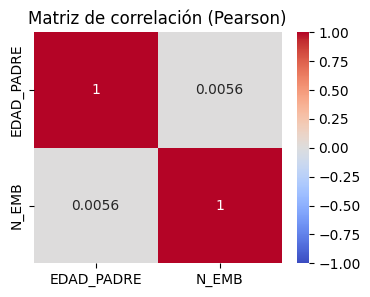

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(datos_corr.corr(method='pearson'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación (Pearson)')
plt.show()


El heatmap de la matriz de correlación evidencia visualmente que la correlación entre EDAD_PADRE y N_EMB es casi nula, reforzando la interpretación de los coeficientes. La ausencia de un gradiente de color apreciable indica que no hay dependencia lineal detectable, lo que concuerda con la dispersión observada en el scatter plot.

##**4. Análisis Integrado** ##

El análisis conjunto de **EDAD_PADRE** y **N_EMB** permite explorar cómo la edad de los padres se relaciona con la experiencia reproductiva en la población. A pesar de que visualmente y a través de los coeficientes de correlación se observa una relación casi nula, la interpretación estadística profunda revela varias conclusiones relevantes.

En primer lugar, la **disparidad en la naturaleza de las variables** influye directamente en la ausencia de correlación significativa. EDAD_PADRE es continua y presenta alta variabilidad, mientras que N_EMB es discreta, con concentración en valores bajos y una cola derecha marcada. La combinación de una variable con alta dispersión continua y otra con conteo discreto genera inherentemente un coeficiente de correlación reducido, incluso si existen patrones subyacentes en subconjuntos específicos de la población.

En segundo lugar, el comportamiento de N_EMB refleja un **patrón reproductivo homogéneo**: la mayoría de las madres se encuentra en sus primeros embarazos, independientemente de la edad del padre. Esto sugiere que factores sociales, culturales y de planificación familiar ejercen un papel más relevante que la edad paterna en la determinación del número de embarazos. Desde un punto de vista estadístico, esta independencia relativa entre variables se evidencia en la **asimetría y curtosis de N_EMB**, que restringen la variabilidad y limitan la posibilidad de establecer relaciones lineales o monotónicas.

Adicionalmente, el análisis de dispersión indica que **no existen subgrupos definidos** donde la relación entre edad y número de embarazos se vuelva más significativa. La nube de puntos se mantiene dispersa sin patrones claros, lo que sugiere que cualquier intento de modelar esta relación mediante regresión lineal sería inapropiado y poco informativo. Técnicamente, la baja correlación observada es consistente con una población donde los valores extremos de EDAD_PADRE no influyen de manera sistemática sobre N_EMB, reforzando la independencia estadística.

Finalmente, desde una perspectiva demográfica, este resultado es coherente con la evidencia empírica: aunque socialmente se podría esperar que padres de mayor edad tengan familias más numerosas, la distribución de N_EMB indica que **la fecundidad se concentra en rangos de edad temprana a media**, mientras que los embarazos múltiples en edades avanzadas son marginales. Esto evidencia que **otros factores externos a la edad paterna** —como planificación familiar, educación y políticas de salud reproductiva— determinan la experiencia reproductiva más que la edad de los padres per se.

En síntesis, el análisis revela que **la edad del padre no constituye un predictor estadísticamente significativo del número de embarazos**, y que la población estudiada muestra patrones de reproducción más homogéneos y concentrados de lo que la edad podría sugerir. La independencia entre las variables resalta la necesidad de incorporar otros factores explicativos para comprender la variabilidad reproductiva en el contexto colombiano.
